In [77]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [6]:
model = Sequential()

In [7]:
model.add(Dense(2, input_dim=2))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [8]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_3 (Dense)                  (None, 2)             6           dense_input_2[0][0]              
____________________________________________________________________________________________________
activation_3 (Activation)        (None, 2)             0           dense_3[0][0]                    
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 1)             3           activation_3[0][0]               
____________________________________________________________________________________________________
activation_4 (Activation)        (None, 1)             0           dense_4[0][0]                    
Total params: 9
___________________________________________________________________________

In [9]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [10]:
X = [
    [0,0],
    [0,1],
    [1,0],
    [1,1]
]
y = [
    0,
    1,
    1,
    1
]

In [11]:
metric_loss = []

In [71]:
history = model.fit(X, y, batch_size=4, verbose=0, nb_epoch=100)
metric_loss = metric_loss + history.history['loss']

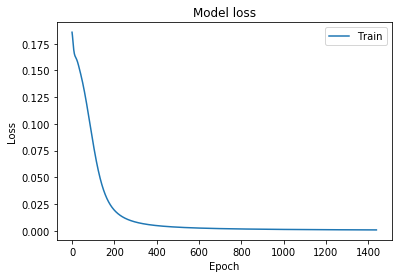

In [78]:
plt.plot(metric_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [73]:
prediction = model.predict(X)
print(prediction)

[[0.03909457]
 [0.97447556]
 [0.973345  ]
 [0.9942702 ]]


In [76]:
model.save('./models/mymodel.h5')